# Decision Tree

In [7]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [8]:
df.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [9]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  500 non-null    int64  
 1   BMI      500 non-null    float64
 2   Outcome  500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [11]:
df["Outcome"].value_counts()

0    326
1    174
Name: Outcome, dtype: int64

In [12]:
df["Outcome"].value_counts(normalize=True)

0    0.652
1    0.348
Name: Outcome, dtype: float64

In [13]:
X = df.iloc[:,:-1].values
y = df["Outcome"].values.reshape(-1,1)

In [14]:
X.shape

(500, 2)

In [15]:
y.shape

(500, 1)

In [16]:
from sklearn.model_selection import train_test_split
# X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [17]:
pd.DataFrame(y_train).value_counts(normalize=True)

0    0.6525
1    0.3475
dtype: float64

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

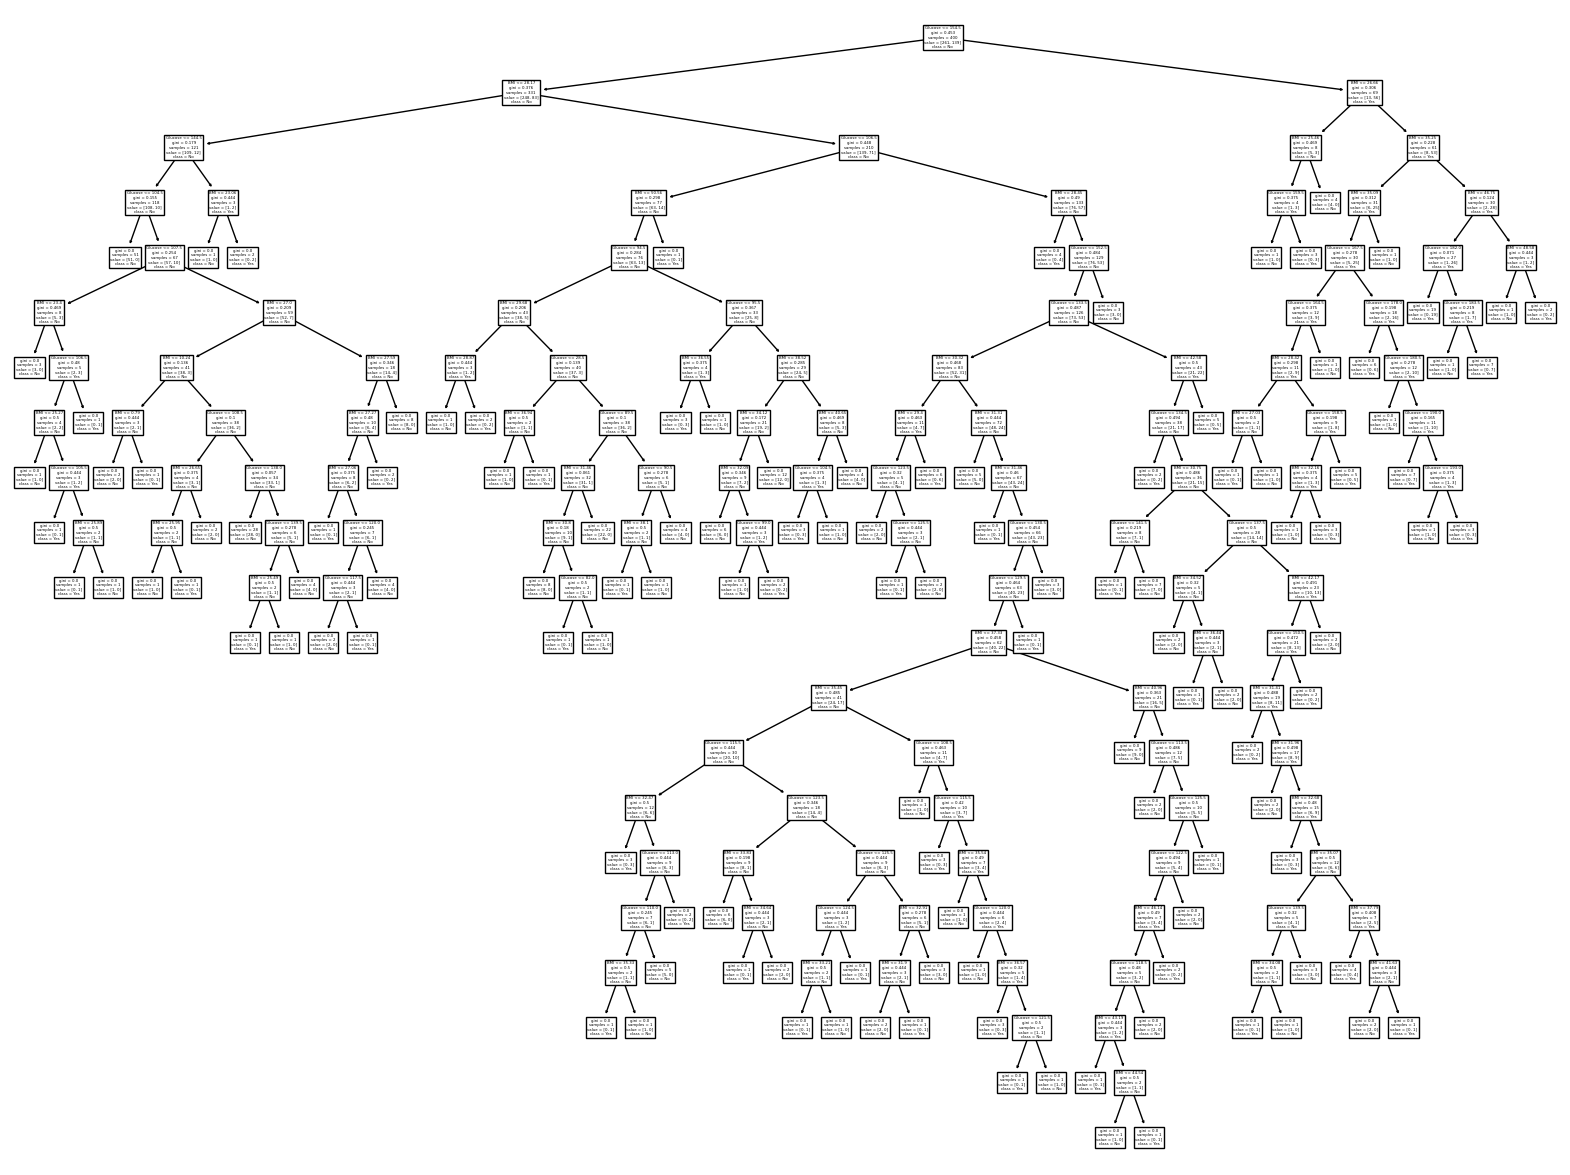

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=["Glucose","BMI"], class_names=["No", "Yes"])
plt.show()

In [20]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

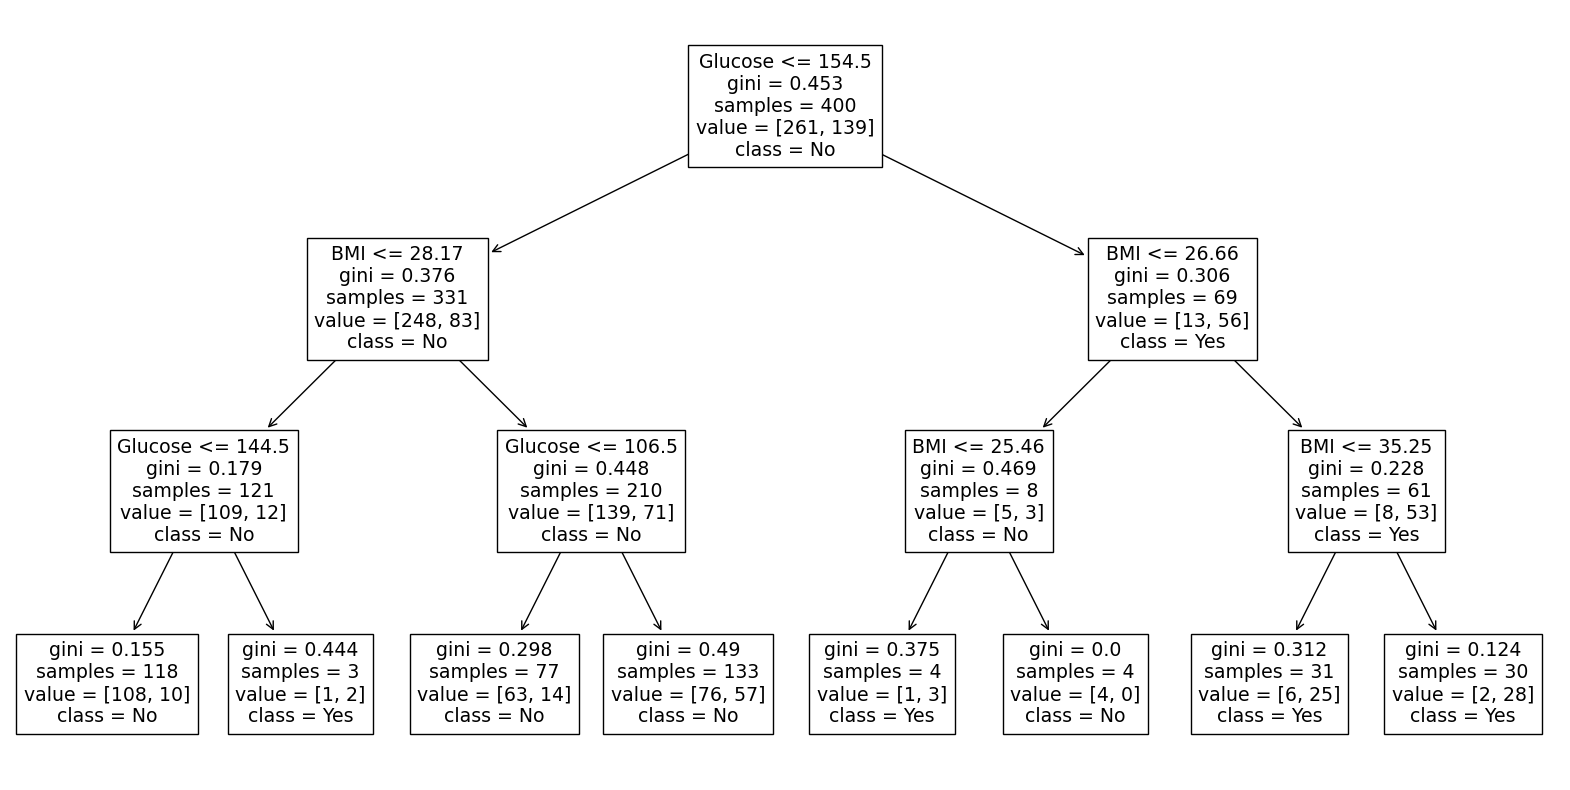

In [21]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=["Glucose","BMI"], class_names=["No", "Yes"])
plt.show()

In [22]:
df.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [23]:
clf.predict([[90,25]])

array([0])

In [24]:
clf.predict([[220,32]])

array([1])

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X_train,y_train, cv=5, scoring = "accuracy")
acc = scores.mean()
print(acc)

0.7474999999999999


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0)

In [28]:
X_train

array([[9.000e+01, 2.480e+01],
       [1.290e+02, 3.180e+01],
       [1.120e+02, 3.226e+01],
       [1.180e+02, 4.222e+01],
       [1.720e+02, 4.170e+01],
       [8.400e+01, 3.590e+01],
       [1.540e+02, 3.118e+01],
       [1.010e+02, 2.398e+01],
       [9.500e+01, 3.662e+01],
       [1.090e+02, 3.542e+01],
       [1.300e+02, 2.758e+01],
       [1.420e+02, 4.308e+01],
       [1.170e+02, 3.300e+01],
       [1.260e+02, 2.804e+01],
       [8.900e+01, 2.810e+01],
       [1.700e+02, 4.500e+01],
       [1.110e+02, 2.436e+01],
       [1.830e+02, 4.116e+01],
       [1.110e+02, 3.268e+01],
       [1.140e+02, 2.774e+01],
       [1.390e+02, 2.480e+01],
       [1.020e+02, 3.242e+01],
       [9.900e+01, 2.880e+01],
       [8.600e+01, 3.112e+01],
       [9.500e+01, 3.440e+01],
       [1.080e+02, 2.690e+01],
       [1.370e+02, 2.382e+01],
       [1.210e+02, 2.716e+01],
       [1.570e+02, 2.500e+01],
       [1.170e+02, 3.396e+01],
       [8.300e+01, 3.180e+01],
       [7.400e+01, 3.546e+01],
       [

In [29]:
rf_clf.fit(X_train,y_train.ravel())
scores = cross_val_score(rf_clf,X_train,y_train.ravel(), cv = 5, scoring="accuracy")
acc = scores.mean()
print(acc)

0.7374999999999999


# SVM with sklearn

In [4]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
scaler = ("scaler",StandardScaler())
svm_linear = ("SVM",SVC(kernel="linear", random_state=0))
pipe = Pipeline([scaler,svm_linear])

In [30]:
pipe.fit(X_train,y_train)

/gs_datasci/GlobalFunctions/Nathan_Global_Functions/.venv/lib64/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(kernel='linear', random_state=0))])

In [33]:
pipe.predict([[90,25]])

array([0])

In [34]:
pipe.predict([[220,32]])

array([1])

In [37]:
scores = cross_val_score(pipe,X_train,y_train.ravel(),cv=5, scoring="accuracy")
acc = scores.mean()
acc

0.7550000000000001

In [44]:
# Optimizing Machine Learning Function

kernel = ["poly","rbf","linear"]

for k in kernel:
  scaler = ("scaler",StandardScaler())
  svm_linear = ("SVM",SVC(kernel=k, random_state=0))
  pipe = Pipeline([scaler,svm_linear])
  pipe.fit(X_train,y_train.ravel())
  scores = cross_val_score(pipe,X_train,y_train.ravel(),cv=5, scoring="accuracy")
  acc = scores.mean()
  print(f"accuracy for kernel {k} is {acc}")

accuracy for kernel poly is 0.72
accuracy for kernel rbf is 0.7550000000000001
accuracy for kernel linear is 0.7550000000000001


In [42]:
kernel = ["rbf"]

for k in kernel:
  scaler = ("scaler",StandardScaler())
  svm_linear = ("SVM",SVC(kernel=k, random_state=0))
  pipe = Pipeline([scaler,svm_linear])
  pipe.fit(X_train,y_train.ravel())
  scores = cross_val_score(pipe,X_train,y_train.ravel(),cv=5, scoring="accuracy")
  acc = scores.mean()
  print(f"accuracy for kernel {k} is {acc}")

accuracy for kernel rbf is 0.7550000000000001


In [43]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.74
